In [5]:
# 导入基本数据包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # 忽略警告

In [6]:
# 读取数据（包括训练集数据与测试集数据）
train_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv',index_col=0)
test_df = pd.read_csv('house-prices-advanced-regression-techniques/test.csv',index_col=0)

In [7]:
# 查看数据
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

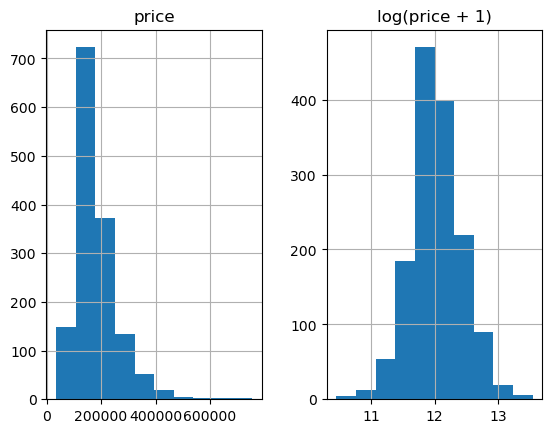

In [10]:
# 合并训练集与测试集，先抽取出目标变量
# log1p的目的：让目标变量数据符合正态分布
# 如果使用了正态分布数据化后，最终的结果需要把正态分布的数据还原
prices = pd.DataFrame({"price":train_df["SalePrice"],"log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [11]:
# 抽取变量数据
y_train = np.log1p(train_df.pop("SalePrice"))

In [12]:
# 训练集与测试集数据合并
all_df = pd.concat((train_df,test_df), axis=0)

In [13]:
all_df.shape

(2919, 79)

In [14]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [15]:
# 变量转化//特征工程
# MSSubClass只是一个MSSubClass
all_df["MSSubClass"].dtypes

dtype('int64')

In [16]:
all_df["MSSubClass"] = all_df["MSSubClass"].astype(str)

In [17]:
# 统计每一个类别的个数
all_df["MSSubClass"].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [18]:
# 把category的变量转化成unmerical表达形式，变成one-hot
pd.get_dummies(all_df["MSSubClass"],
prefix = 'MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
# 上一个步骤把MSSubClass分成12个column，每一个代表一个category。是就是1，不是就是0

In [20]:
# 把所有的category数据，都给one-hot
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# 处理数据缺失情况
all_dummy_df.isnull().sum().sort_values(ascending=False).head()

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
dtype: int64

In [23]:
# 可以使用多种方法来填充数据的缺失，此案例先采用均值填充(0、最大值-最小值、中位数等)
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [24]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [26]:
all_dummy_df.isnull().sum().sum()

0

In [27]:
# 查看那些数据是numerical
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [28]:
# 计算标准分布(x-x`)/s
# 计算出均值与方差
numeric_cols_means = all_dummy_df.loc[:,numeric_cols].mean()
numeric_cols_std = all_dummy_df.loc[:,numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols]-numeric_cols_means)/numeric_cols_std

In [29]:
# 建立模型

In [30]:
# 把数据集分回训练集/测试集
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [31]:
dummy_train_df.shape,dummy_test_df.shape

((1460, 303), (1459, 303))

In [32]:
# 导入Ridge Regression模型
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [33]:
# 把DF转化成numpy Array，可以更好的与skleanr契合
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [37]:
# 使用sklearn中的cross validation方法来测试模型
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [38]:
# 存下所有的交叉验证值（cv），看看哪一个alpha值更好（调参）

Text(0.5, 1.0, 'Alpha vs CV Error')

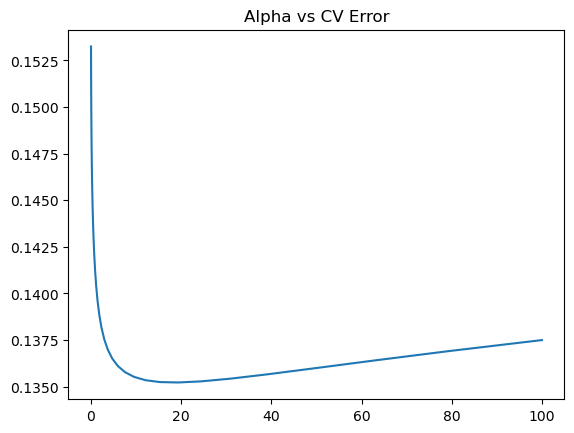

In [39]:
plt.plot(alphas,test_scores)
plt.title('Alpha vs CV Error')

In [40]:
# alpha=10～20时，可以吧score达到0.135左右

In [41]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor

In [42]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200,max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Max Features vs CV Error')

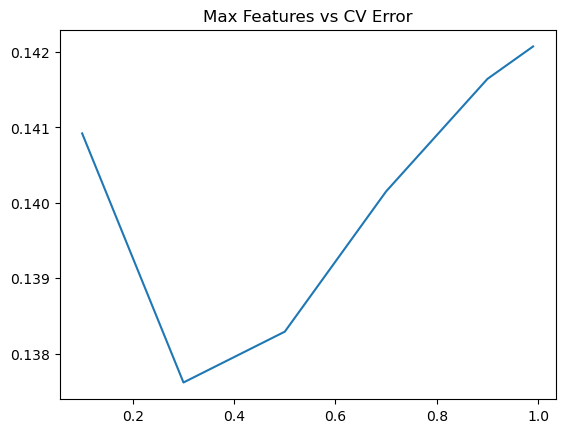

In [43]:
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')

In [44]:
# 用RF的最有值达到0.137

In [52]:
# 使用xgboots

In [53]:
from xgboost import XGBRegressor

In [54]:
params = [1, 2, 3, 4, 5, 6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'max_depth vs CV Error')

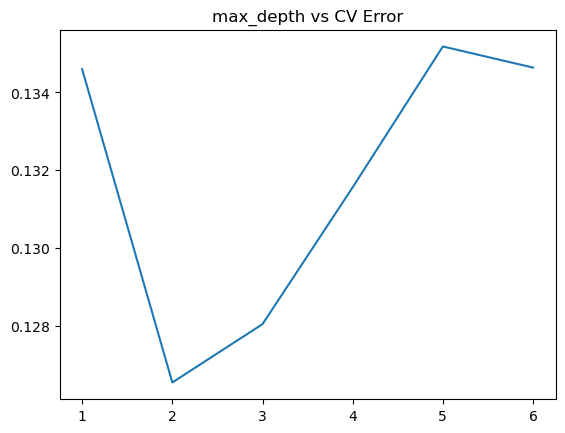

In [55]:
plt.plot(params,test_scores)
plt.title('max_depth vs CV Error')

In [ ]:
# 深度为2时，错误率缩小至0.127

In [56]:
xgb = XGBRegressor(max_depth=2)

In [45]:
# 用Stacking的思维来汲取两种或者多种模型的有点
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500,max_features=.3)

In [57]:
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [58]:
# 还原之前的正态分布数据  ==>>expm1
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))
y_xgb = np.expm1(xgb.predict(X_test))

In [48]:
# 一个正经的ensemble就是把这群model的预测结果作为最新的input，再做一次预测。就是直接【均值化】
y_fianl = (y_ridge + y_rf)/2

In [59]:
y_fianl
y_xgb

array([125922.414, 157918.7  , 188508.02 , ..., 160153.2  , 119210.32 ,
       227062.92 ], dtype=float32)

In [63]:
# 提交结果
submission_df = pd.DataFrame(data={'Id':test_df.index,'SalePrice':y_fianl})
submission_df.head(10)

,Id,SalePrice
0,1461,119475.459519
1,1462,151235.821537
2,1463,174934.343185
3,1464,189404.899347
4,1465,194954.161814
5,1466,176112.443175
6,1467,177026.705897
7,1468,169042.855052
8,1469,185294.041415
9,1470,123194.277481


In [62]:
submission_df = pd.DataFrame(data={'Id':test_df.index,'SalePrice':y_xgb})
submission_df.head(10)

,Id,SalePrice
0,1461,125922.414062
1,1462,157918.703125
2,1463,188508.015625
3,1464,193684.171875
4,1465,186918.703125
5,1466,174454.437500
6,1467,166986.281250
7,1468,174164.031250
8,1469,188346.109375
9,1470,124115.187500
